<span style="color: GREEN;font-weight:700;font-size:50px">
    World Happiness Report
</span>

<span style="color:darkgreen;font-weight:700;font-size:20px">
    Group Number 8
</span>

<span style="color:black;font-weight:700;font-size:15px">
    Group Members: Kfir Diamond, Lihi Noy, Gal Peleg & Mika Rosenbaum
</span>

https://www.kaggle.com/code/gcmadhan/world-happiness-index-report


<img src="https://github.com/Shelmiat/happiness_world_report/blob/main/sign-happy-xlarge.jpeg?raw=true" alt="alt text" title="image Title" width="1000"/>


<span style="color:green;font-weight:700;font-size:30px">
   Background
</span>

The World Happiness Report, published by the Sustainable Development Solutions Network and powered by Gallup World Poll data, emphasizes the importance of happiness and well-being as fundamental factors in government policy. It provides an assessment of global happiness levels and explores how the science of happiness can shed light on individual and national differences in happiness. The report aims to draw attention to the significance of happiness and promote its consideration in shaping policies worldwide.

<span style="color:green;font-weight:700;font-size:25px">
    About the columns:
</span>

1.Log GDP per capita: A measure of a country's economic output per person adjusted for Purchasing Power Parity (PPP). The natural logarithm of GDP per capita is used for better data fitting.

2.Healthy life expectancy at birth: Average number of years a newborn can expect to live in good health. Data is interpolated and extrapolated from available World Health Organization (WHO) data.

3.Social support: National average of responses to the Gallup World Poll question on the availability of relatives or friends for support in times of trouble.

4.Freedom to make life choices: National average of binary responses to the Gallup World Poll question about satisfaction with freedom to choose one's life.

5.Generosity: Residual obtained from regressing national average donation responses on log GDP per capita.

6.Perceptions of corruption: Average of binary answers to Gallup World Poll questions on perceived corruption in government and business sectors.

7.Positive affect: Average of previous-day effects measures for laughter, enjoyment, and interest.

8.Negative affect: Average of previous-day effects measures for worry, sadness, and anger. 

In [2]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
happy_df = pd.read_csv('World Happiness Report.csv')

import sklearn as sk
from sklearn.linear_model import LinearRegression

import plotly.express as px
import plotly.offline as py
py.init_notebook_mode(connected=True)
from PIL import Image
from io import BytesIO

In [3]:
happy_df.head()

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,South Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440


In [4]:
happy_df.dtypes

Country Name                          object
Regional Indicator                    object
Year                                   int64
Life Ladder                          float64
Log GDP Per Capita                   float64
Social Support                       float64
Healthy Life Expectancy At Birth     float64
Freedom To Make Life Choices         float64
Generosity                           float64
Perceptions Of Corruption            float64
Positive Affect                      float64
Negative Affect                      float64
Confidence In National Government    float64
dtype: object

In [5]:
happy_df.isnull().sum()

Country Name                           0
Regional Indicator                   112
Year                                   0
Life Ladder                            0
Log GDP Per Capita                    20
Social Support                        13
Healthy Life Expectancy At Birth      54
Freedom To Make Life Choices          33
Generosity                            73
Perceptions Of Corruption            116
Positive Affect                       24
Negative Affect                       16
Confidence In National Government    361
dtype: int64

In [6]:
happy_df.shape

(2199, 13)

After recieving the number of rows in the dataset, we know that each column has a legitimate ammount of 'Null' values. \
Let's get busy.

<span style="color:green;font-weight:700;font-size:30px">
    Searching For Correlations
</span>

<span style="color:green;font-weight:700;font-size:20px">
     Let's investigate expected correlations:
</span>

The "Grant Study" of Harvard University is the longest study of adult life that's ever been done, from 1938 and it's still going on today. 
The clearest message that we get from this 85 year study is that good relationships keep us happier.

'Ted' talk about the research:
https://www.ted.com/talks/robert_waldinger_what_makes_a_good_life_lessons_from_the_longest_study_on_happiness/c?subtitle=en 

Let's see if we can verify it with our data: 

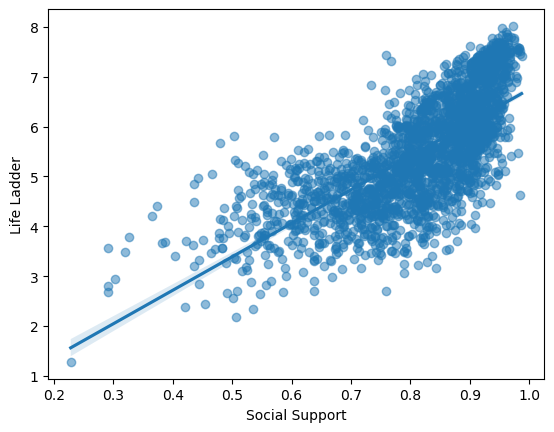

In [7]:
sns.regplot(data=happy_df, x='Social Support', y='Life Ladder', scatter_kws={'alpha': 0.5})
plt.show()




<img src="https://github.com/Shelmiat/happiness_world_report/blob/main/%D7%97%D7%99%D7%91%D7%95%D7%A7.jpeg?raw=true" alt="alt text" title="image Title" width="400"/>


\
\
<span style="color:green;font-weight:700;font-size:20px">
     "Money doesn't bring happiness"... does it?
</span>

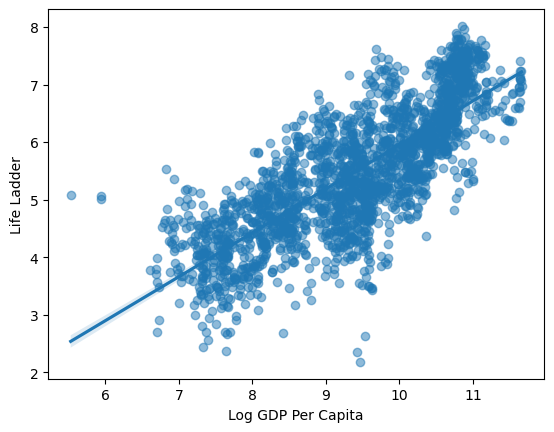

In [8]:
sns.regplot(data=happy_df, x='Log GDP Per Capita', y='Life Ladder', scatter_kws={'alpha': 0.5})
plt.show()

We've seen some strong correlations related to the life ladder. \
Now let's check out correlations related to corruptions:

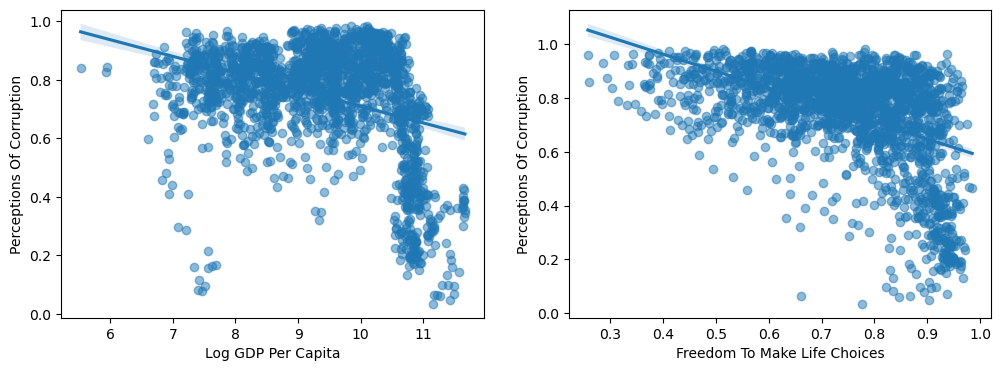

In [9]:
fig, ax = plt.subplots(1,2, figsize = (12,4))
sns.regplot(data=happy_df, x='Log GDP Per Capita', y='Perceptions Of Corruption', scatter_kws={'alpha': 0.5}, ax=ax[0])
sns.regplot(data=happy_df, x='Freedom To Make Life Choices', y='Perceptions Of Corruption', scatter_kws={'alpha': 0.5}, ax=ax[1])
plt.show()

Not as we expected, now we got weak correlations.\
In addition to that, most of the countries seem think their government and business sectors are corrupt:

<span style="color:green;font-weight:700;font-size:25px">
    Sub conclusion 
</span>

אנחנו ציפינו לקבל קורלציה שלילית וחזקה בין תפיסת השחיתות בממשלה לבין חופש הבחירה. ההנחה היא ששחיתות מחבלת בדמוקרטיה ולכן הנחנו שאזרחים יכולים לחשוש מלעשות בחירות באופן חופשי. בנוסף, סקרן אותנו לדעת מה הקשר שבין תוצר מקומי גולמי לבין תפיסת השחיתות- האם ככל שתפיסת השחיתות גבוהה יותר, התמ"ג גבוה או נמוך יותר וכן להיפך. להפתענו קיבלנו ששתי הקורלציות שליליות וחלשות. משמע שאין קשר חזק בין תפיסת השחיתות לתמ"ג ולחופש הבחירה. 


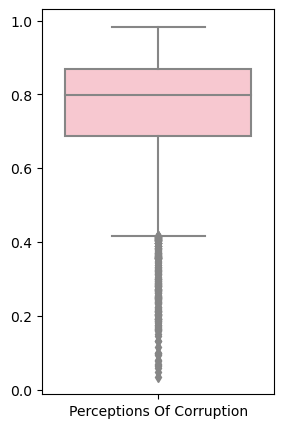

In [10]:
plt.figure(figsize=(3,5))
sns.boxplot(data = happy_df[['Perceptions Of Corruption']], color='#FFC0CB')
plt.show()

<span style="color:green;font-weight:700;font-size:30px">
    Conclusion number 1
</span>

בעקבות הקורלציות האחרונות שחקרנו, היה נראה כי תפיסת השחיתות בעולם גבוהה וסיקרן אותנו איך היא מפוזרת. מצאנו שהחציון מאוד גבוה וערכו 0.8 בעוד שיש מדינות בודדות שנתוניהן מצביעים על תפיסת שחיתות נמוכה יחסית.

<span style="color:green;font-weight:700;font-size:20px">
    Heatmap
</span>

We found two good correlations. Let's look for more, effectively:

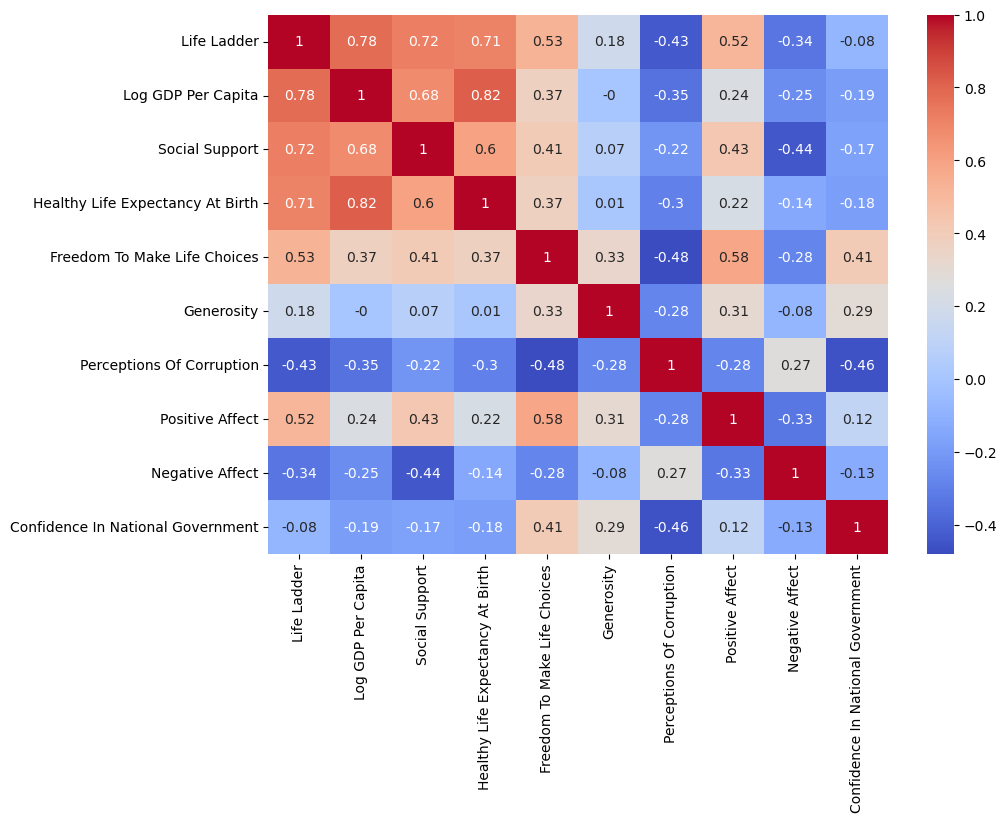

In [11]:
my_cols = ['Life Ladder', 
       'Log GDP Per Capita', 'Social Support',
       'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices',
       'Generosity', 'Perceptions Of Corruption', 'Positive Affect',
       'Negative Affect', 'Confidence In National Government']
plt.figure(figsize=(10,7))
my_cor = happy_df[my_cols].corr().round(2)
sns.heatmap(data=my_cor, cmap='coolwarm', annot=True)
plt.show()

In addition to the two corralations we got at the beggining, now we see a third strong connection between the 'Life Ladder' and the 'Healthy Life Expectancy At Birth'. \
We will use it later on. 

<span style="color:green;font-weight:700;font-size:30px">
    Top 10 
</span>


Who are the top 10 happiest countries on average, from 2005? \
What about the most relevant year, 2022? 

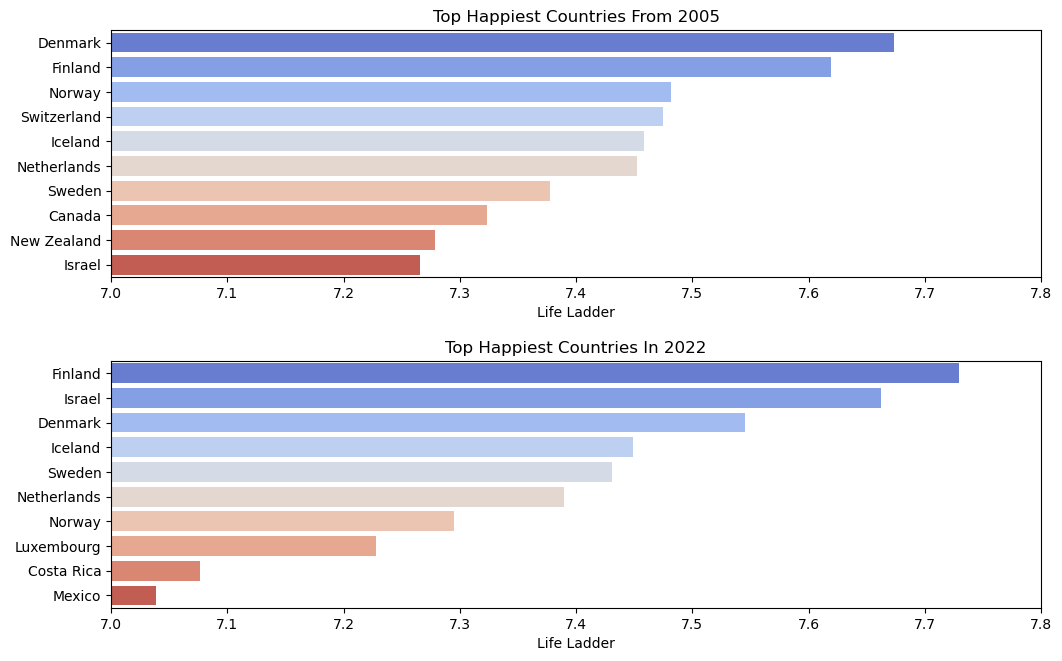

In [12]:
av_df = happy_df.groupby('Country Name')[['Life Ladder']].mean().sort_values('Life Ladder', ascending=False).reset_index()
df_2022 = happy_df[happy_df.Year==2022].sort_values('Life Ladder', ascending=False).reset_index()

fig, ax = plt.subplots(2,1, figsize = (12,7.5))
plt.subplots_adjust(hspace = 0.34)

sns.barplot(data=av_df.head(10), x='Life Ladder', y='Country Name', ax = ax[0], palette='coolwarm')
ax[0].set_xlim(7,7.8)
ax[0].set_title('Top Happiest Countries From 2005')
ax[0].set_ylabel("") 

sns.barplot(data=df_2022.head(10), x='Life Ladder', y='Country Name', ax = ax[1], palette='coolwarm')
ax[1].set_xlim(7,7.8)
ax[1].set_title('Top Happiest Countries In 2022')
ax[1].set_ylabel("") 
plt.show()

<span style="color:green;font-weight:700;font-size:30px">
    Sub conclusion
</span>

Out of 165 different contries, Israel is located at the 10th place on the life ladder. \
Moreover - in the last year of our dataset - Israel is at the second, outstanding place (!) 

Let's check out all the contries we bypassed, using our best correlation - GDP:

In [13]:
israel_df = happy_df[happy_df['Country Name']=='Israel']
canada_df = happy_df[happy_df['Country Name']=='Canada']
new_zealand_df = happy_df[happy_df['Country Name']=='New Zealand']
switzerland_df = happy_df[happy_df['Country Name']=='Switzerland']
denmark_df = happy_df[happy_df['Country Name']=='Denmark']
norway_df = happy_df[happy_df['Country Name']=='Norway']
sweden_df = happy_df[happy_df['Country Name']=='Sweden']
netherlands_df = happy_df[happy_df['Country Name']=='Netherlands']
iceland_df = happy_df[happy_df['Country Name']=='Iceland']

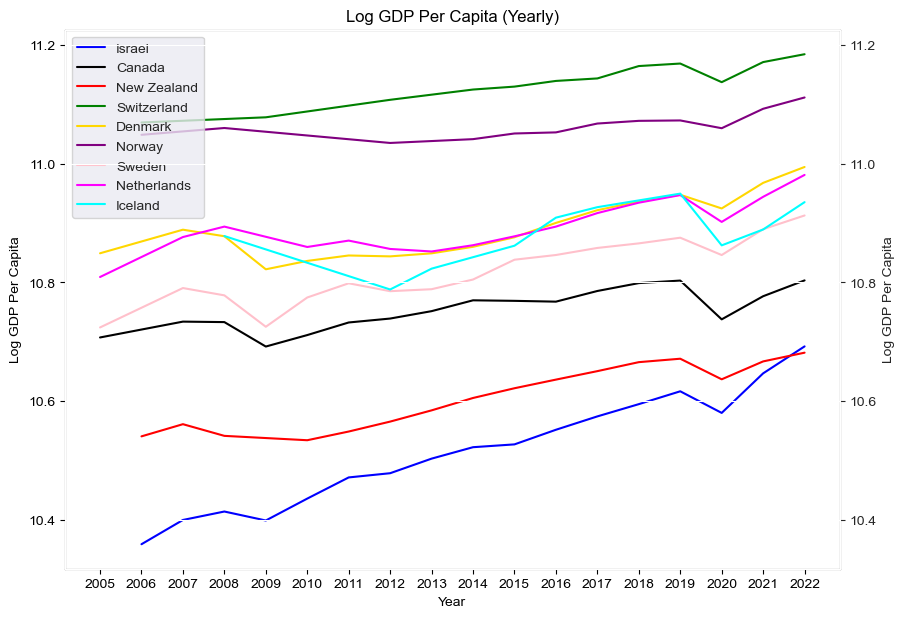

In [14]:
fig, ax1 = plt.subplots(figsize=(10, 7))
sns.set_style("darkgrid")

ax1.plot(israel_df['Year'], israel_df['Log GDP Per Capita'], label='Israel', color='blue')
ax1.plot(canada_df['Year'], canada_df['Log GDP Per Capita'], label='Canada', color='black')
ax1.plot(new_zealand_df['Year'], new_zealand_df['Log GDP Per Capita'], label='New Zealand', color='red')
ax1.plot(switzerland_df['Year'], switzerland_df['Log GDP Per Capita'], label='Switzerland', color='green')
ax1.plot(denmark_df['Year'], denmark_df['Log GDP Per Capita'], label='Denmark', color='gold')
ax1.plot(norway_df['Year'], norway_df['Log GDP Per Capita'], label='Norway', color='purple')
ax1.plot(sweden_df['Year'], sweden_df['Log GDP Per Capita'], label='Sweden', color='pink')
ax1.plot(netherlands_df['Year'], netherlands_df['Log GDP Per Capita'], label='Netherlands', color='magenta')
ax1.plot(iceland_df['Year'], iceland_df['Log GDP Per Capita'], label='Iceland', color='cyan')

ax2 = ax1.twinx()
ax2.set_ylim(ax1.get_ylim())
ax2.set_ylabel('Log GDP Per Capita')
ax2.tick_params(axis='y')

ax1.set_xticks(np.arange(2005, 2023, 1))
ax1.set_xlabel('Year')
ax1.set_ylabel('Log GDP Per Capita')
ax1.set_title('Log GDP Per Capita (Yearly)')
ax1.legend(loc='upper left')

plt.show()

It can be seen that Israel has the steepest slope. \
Regardless of that, it is interesting to see how in 2020 the Corona virus hit all the countries.

<span style="color:green;font-weight:700;font-size:30px">
    Conclusion number 2
</span>

ראינו שבשנת 2022 ישראל טיפסה למקום השני (!) כמדינה המאושרת ביותר. חקרנו את המשתנה עם הקורלציה החזקה ביותר למדד האושר (GDP) ומצאנו שאכן בשנת 2022 לישראל הייתה את הקפיצה הגדולה ביותר.בנוסף, ניתן לראות כי בשנת 2020 חלה ירידה משמעותית במדד ה GDP וזאת בעקבות מגיפת הקורונה 

כסף קונה אושר


<img src="https://github.com/Shelmiat/happiness_world_report/blob/main/%D7%9B%D7%A1%D7%A3.jpeg?raw=true" alt="alt text" title="image Title" width="600"/>



<span style="color:green;font-weight:700;font-size:20px">
    Our Neighborhood
</span>

In [15]:
israel_df = happy_df[happy_df['Country Name']=='Israel']
lebanon_df = happy_df[happy_df['Country Name']=='Lebanon']
syria_df = happy_df[happy_df['Country Name']=='Syria']
jordan_df = happy_df[happy_df['Country Name']=='Jordan']
egypt_df = happy_df[happy_df['Country Name']=='Egypt']

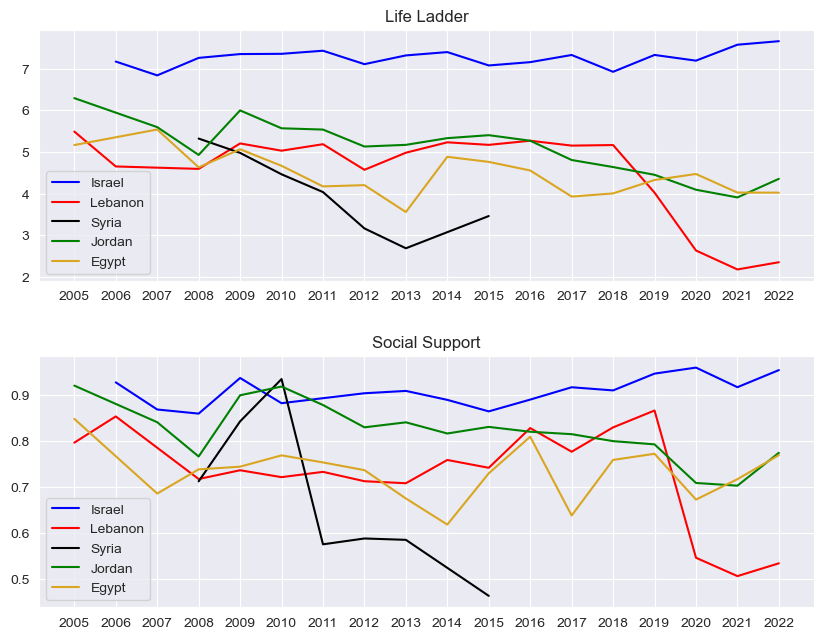

In [16]:
fig, axes = plt.subplots(2, 1, figsize=(10, 7.5))
plt.subplots_adjust(hspace=0.3)
sns.set_style("darkgrid")

axes[0].plot(israel_df['Year'], israel_df['Life Ladder'], label='Israel', color='blue')
axes[0].plot(lebanon_df['Year'], lebanon_df['Life Ladder'], label='Lebanon', color='red')
axes[0].plot(syria_df['Year'], syria_df['Life Ladder'], label='Syria', color='black')
axes[0].plot(jordan_df['Year'], jordan_df['Life Ladder'], label='Jordan', color='green')
axes[0].plot(egypt_df['Year'], egypt_df['Life Ladder'], label='Egypt', color='goldenrod')
axes[0].set_xticks(np.arange(2005, 2023, 1))
axes[0].set_title('Life Ladder')
axes[0].legend()

axes[1].plot(israel_df['Year'], israel_df['Social Support'], label='Israel', color='blue')
axes[1].plot(lebanon_df['Year'], lebanon_df['Social Support'], label='Lebanon', color='red')
axes[1].plot(syria_df['Year'], syria_df['Social Support'], label='Syria', color='black')
axes[1].plot(jordan_df['Year'], jordan_df['Social Support'], label='Jordan', color='green')
axes[1].plot(egypt_df['Year'], egypt_df['Social Support'], label='Egypt', color='goldenrod')
axes[1].set_xticks(np.arange(2005, 2023, 1))
axes[1].set_title('Social Support')
axes[1].legend()

plt.show()

The similarity between them both is emphasized. \
We see the overthrow of Syria in 2010. could be because of the start of the civil war. \
In 2022, Lebanon was ranked second worst in the life ladder.

<span style="color:green;font-weight:700;font-size:30px">
    World Map
</span>

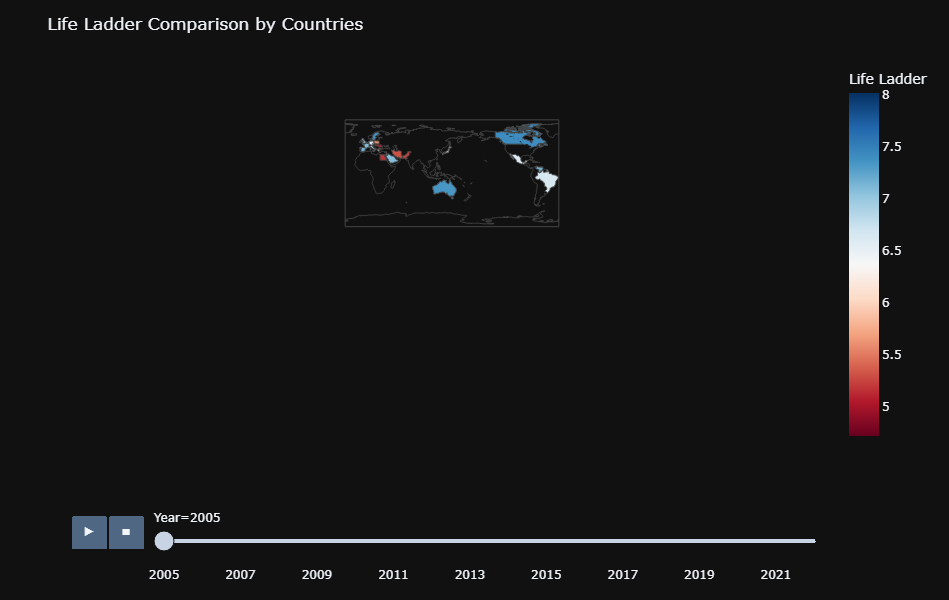

In [17]:
fig = px.choropleth(happy_df.sort_values("Year"), 
                    locations = "Country Name",
                    color = "Life Ladder",
                    locationmode = "country names",
                    template = "plotly_dark",
                     color_continuous_scale= 'RdBu',
                    animation_frame = "Year")
fig.update_layout(title = "Life Ladder Comparison by Countries", height=600, width=800)
fig.show()

Taking a quick look at the world map, we can tell right away that most of Africa is not having a blast. \
lets investigate it, now focusing on the third strongest correlation - "Healthy Life Expectancy At Birth":

First, what specific Regional Indicator are we looking for? What contries does it contain?

In [18]:
happy_df['Regional Indicator'].unique()

array(['South Asia', 'Central and Eastern Europe',
       'Middle East and North Africa', nan, 'Latin America and Caribbean',
       'Commonwealth of Independent States', 'North America and ANZ',
       'Western Europe', 'Sub-Saharan Africa', 'Southeast Asia',
       'East Asia'], dtype=object)

In [19]:
happy_df[happy_df['Regional Indicator']=='Sub-Saharan Africa']['Country Name'].unique()

array(['Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Chad',
       'Comoros', 'Congo (Brazzaville)', 'Ethiopia', 'Gabon', 'Gambia',
       'Ghana', 'Guinea', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius',
       'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Senegal',
       'Sierra Leone', 'South Africa', 'Tanzania', 'Togo', 'Uganda',
       'Zambia', 'Zimbabwe'], dtype=object)

Our Regional Indicator will be 'Sub-Saharan Africa'.  

In [20]:
happy_df2 = happy_df.copy()
happy_df2 = happy_df2[happy_df2.Year > 2005]
happy_df2 = happy_df2.replace(['South Asia', 'Central and Eastern Europe',
       'Middle East and North Africa', 'Latin America and Caribbean',
       'Commonwealth of Independent States', 'North America and ANZ',
       'Western Europe', 'Southeast Asia',
       'East Asia'], 'Else')
happy_df2[happy_df2['Country Name']=='Israel']=happy_df2[happy_df2['Country Name']=='Israel'].replace('Else','Israel')
order = ['Sub-Saharan Africa', 'Else', 'Israel']
happy_df2['Regional Indicator'] = pd.Categorical(happy_df2['Regional Indicator'], categories=order, ordered=True)
color_palette = {'Israel': '#CCCCCC', 'Else': 'blue', 'Sub-Saharan Africa': 'red'}

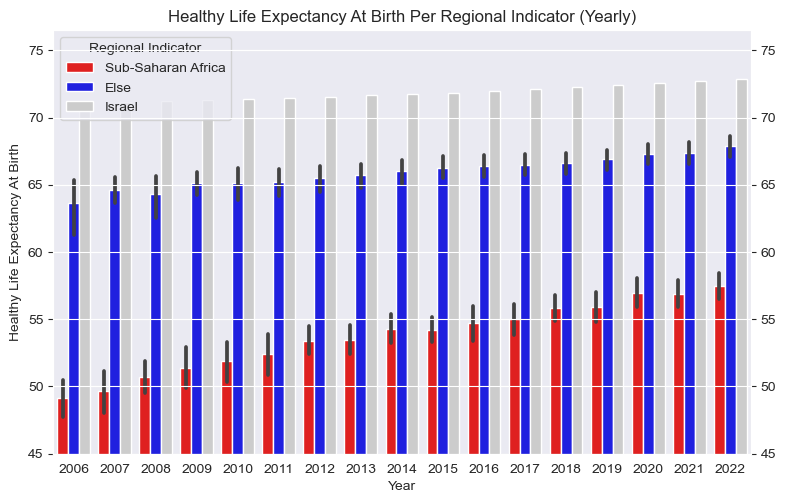

In [21]:
plt.figure(figsize=(9,5.5))
sns.set_style("darkgrid")
ax = sns.barplot(data=happy_df2, x='Year', y='Healthy Life Expectancy At Birth', hue='Regional Indicator', palette=color_palette)
ax.set_ylim(45)
ax.set_title('Healthy Life Expectancy At Birth Per Regional Indicator (Yearly)')
ax2 = ax.twinx()
ax2.set_ylim(45, ax.get_ylim()[1])
ax.yaxis.tick_left()
ax2.yaxis.tick_right()
plt.show()

<span style="color:green;font-weight:700;font-size:30px">
    Conclusion number 3
</span>

As expected, Africa's healthy life expectancy at birth is way below the average. \
But despite the difference, it's marked that the continent is going through a huge change: \
In the past twenty years, while the rest of the world's life expectacy stays almost the same, Africa's grows by around 8 years. \
Still, there's a long way to go. \
There is no need to expand that our country is again at a remarkable, stable spot in another category. 

In 2005 there is a lack of Life Expectency values in Africa and Israel. Same in our Life Ladder World Map; in 2005 there are less countries than usual. 


<img src="https://github.com/Shelmiat/happiness_world_report/blob/main/%D7%90%D7%A4%D7%A8%D7%99%D7%A7%D7%94.jpeg?raw=true" alt="alt text" title="image Title" width="500"/>



After a small investigation on the entire dataset, we can infer that the '2005' column is unusual because it's unreliable, therefore we didn't show it.

In [22]:
print(f"Countries number in 2005: {happy_df[happy_df.Year==2005]['Country Name'].count()}\nCountries number in usual: {len(happy_df['Country Name'].unique())}")

Countries number in 2005: 27
Countries number in usual: 165


<span style="color:green;font-weight:700;font-size:30px">
    Conclusion number 4
</span>

אי אפשר להתעלם מהעובדה המדהימה שישראל מחזיקה בנתונים גבוהים בכל הפיצ'רים שחקרנו, שהם בעלי הקורלציה הגבוהה ביותר למדד האושר- תמ"ג, תמיכה חברתית ומצב בריאותי בילודה. כל אלה מובילים לכך שישראל נמצאת במקום גבוה ביותר במדד האושרץ

<span style="color:pink;font-weight:700;font-size:30px">
   <3 תודה על ההקשבה
</span>


<img src="https://media1.giphy.com/media/fnagW93r8Dc2I/200w.gif?cid=6c09b952ms7cbdqdhru3wnc0vpx17b2aid6bpxkssi2hlck0&ep=v1_gifs_search&rid=200w.gif&ct=g" alt="alt text" title="image Title" width="500"/>
